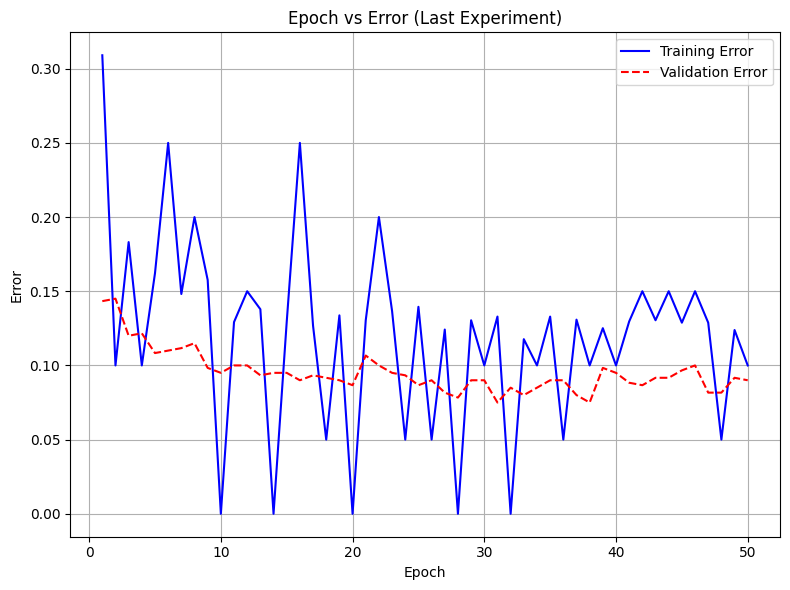

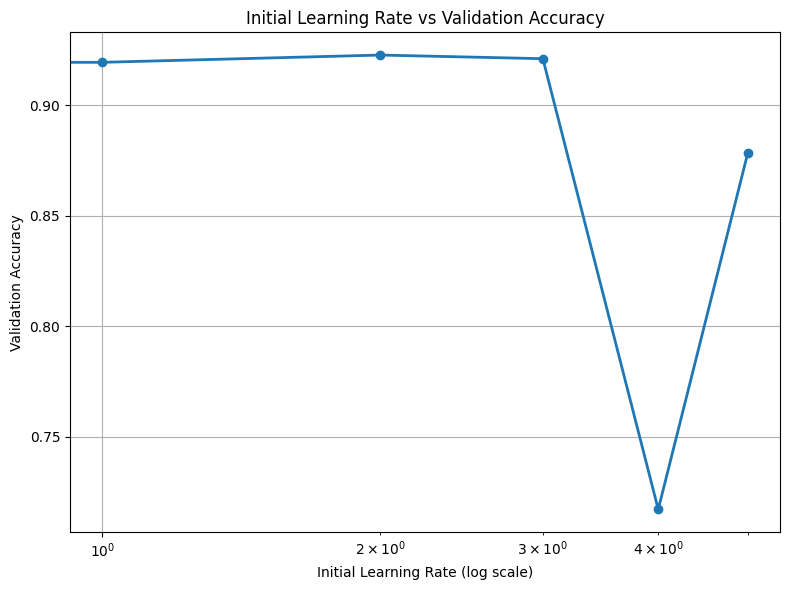

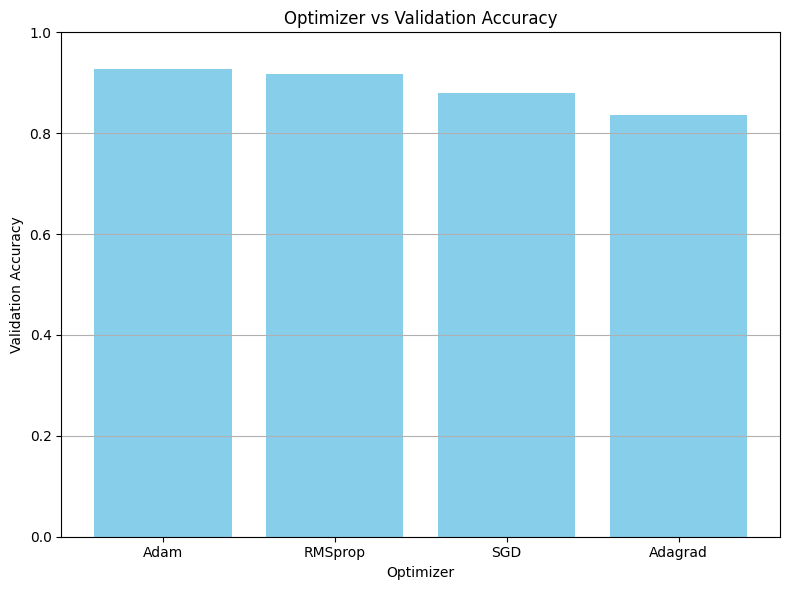

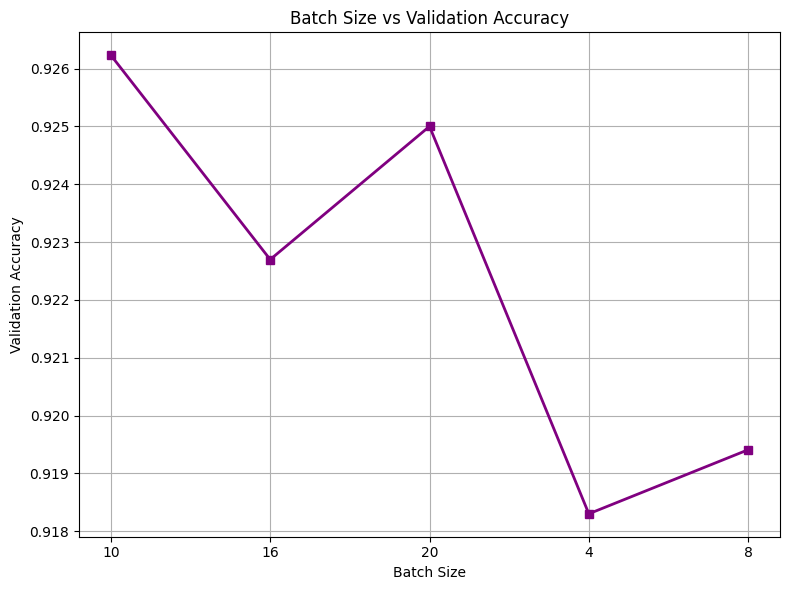

In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Paths
summary_csv = 'results/experiment_summary.csv'
histories_dir = 'results/histories'

# Load experiment summary CSV
if not os.path.exists(summary_csv):
    raise FileNotFoundError(f"Experiment summary CSV not found at {summary_csv}. Run training first.")

df = pd.read_csv(summary_csv)

# --- 1. Epoch vs Error graph ---

# Use the last experiment's history for epoch vs error plot
last_history_path = df.iloc[-1]['history_path']
if not os.path.exists(last_history_path):
    raise FileNotFoundError(f"History file not found: {last_history_path}")

with open(last_history_path, 'rb') as f:
    history = pickle.load(f)

epochs = range(1, len(history['val_accuracy']) + 1)
train_error = [1 - acc for acc in history['accuracy']]
val_error = [1 - acc for acc in history['val_accuracy']]

plt.figure(figsize=(8,6))
plt.plot(epochs, train_error, 'b-', label='Training Error')
plt.plot(epochs, val_error, 'r--', label='Validation Error')
plt.title('Epoch vs Error (Last Experiment)')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Initial Learning Rate vs Validation Accuracy ---

lr_df = df[df['experiment_type'] == 'learning_rate'].copy()
if not lr_df.empty:
    lr_df.sort_values(by='value', inplace=True)
    plt.figure(figsize=(8,6))
    plt.plot(lr_df['value'], lr_df['best_val_accuracy'], 'o-', linewidth=2)
    plt.xscale('log')
    plt.title('Initial Learning Rate vs Validation Accuracy')
    plt.xlabel('Initial Learning Rate (log scale)')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No learning rate experiment data found.")

# --- 3. Optimizer vs Validation Accuracy ---

opt_df = df[df['experiment_type'] == 'optimizer'].copy()
if not opt_df.empty:
    # Sort by accuracy descending for better visualization
    opt_df.sort_values(by='best_val_accuracy', ascending=False, inplace=True)
    plt.figure(figsize=(8,6))
    plt.bar(opt_df['value'], opt_df['best_val_accuracy'], color='skyblue')
    plt.title('Optimizer vs Validation Accuracy')
    plt.xlabel('Optimizer')
    plt.ylabel('Validation Accuracy')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No optimizer experiment data found.")

# --- 4. Batch Size vs Validation Accuracy ---

bs_df = df[df['experiment_type'] == 'batch_size'].copy()
if not bs_df.empty:
    bs_df.sort_values(by='value', inplace=True)
    plt.figure(figsize=(8,6))
    plt.plot(bs_df['value'], bs_df['best_val_accuracy'], 's-', linewidth=2, color='purple')
    plt.title('Batch Size vs Validation Accuracy')
    plt.xlabel('Batch Size')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No batch size experiment data found.")
